In [3]:
# import required libraries for dataframe and visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization

# Import any other libraries you may need 
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
import random
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
p = 0.02  # to randomly select 2% of the rows https://www.kaggle.com/datasets/andrewmvd/spotify-playlists
df = pd.read_csv("spotify_dataset.csv", error_bad_lines=False, warn_bad_lines=False, skiprows=lambda i: i>0 and random.random() > p)
df.head()

,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Crowded House,Nobody Wants To,HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Bruce Springsteen,Born to Run,IOW 2012
3,9cc0cfd4d7d7885102480dd99e7a90d6,Noel Gallagher's High Flying Birds,Everybody's On the Run,IOW 2012
4,07f0fc3be95dcd878966b1f9572ff670,Solar Fields,Air Song - 8 am Version,Chill out


In [5]:
df.shape

(257080, 4)

In [6]:
df.dtypes

user_id            object
 "artistname"      object
 "trackname"       object
 "playlistname"    object
dtype: object

In [7]:
df.describe(include='all') 

,user_id,"""artistname""","""trackname""","""playlistname"""
count,257080,256374,257080,257057
unique,13426,47044,153581,66257
top,4398de6902abde3351347b048fcdc287,Daft Punk,Intro,Starred
freq,5898,728,137,26692


If this dataset works ok, we could do some research out of this.
1. Build recommendation systems with collaborative filtering.
2. Try to do the recommendation for user A.
3. Collect the recommendation outputs. (Q. Are outputs artists, or tracks?)
(4. Check the meaningful music features of each artists/tracks. Do they have similarity, or something different? How did collaborative filter work?)

In [15]:
# Replace column names:

df.columns = df.columns.str.replace('"', ' ')
df.columns = df.columns.str.replace('name', ' ')
df.columns = df.columns.str.replace('_id', ' ')
df.columns = df.columns.str.replace(' ', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257080 entries, 0 to 257079
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      257080 non-null  object
 1   artist    256374 non-null  object
 2   track     257080 non-null  object
 3   playlist  257057 non-null  object
dtypes: object(4)
memory usage: 7.8+ MB


In [16]:
# Find null values:

df.isnull().sum()

user          0
artist      706
track         0
playlist     23
dtype: int64

In [17]:
# Find duplicates:

df.duplicated().sum()

0

<AxesSubplot:>

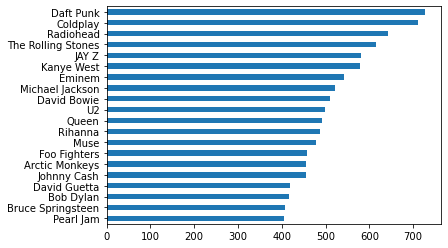

In [24]:
# Top 20 artists:

df['artist'].value_counts()[:20].sort_values().plot(kind = 'barh')

<AxesSubplot:>

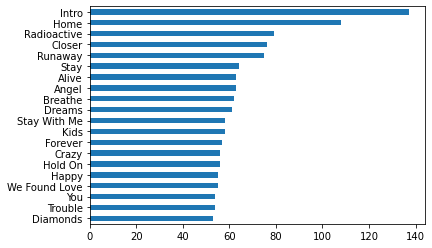

In [25]:
# Top 20 tracks:

df['track'].value_counts()[:20].sort_values().plot(kind = 'barh')

<AxesSubplot:>

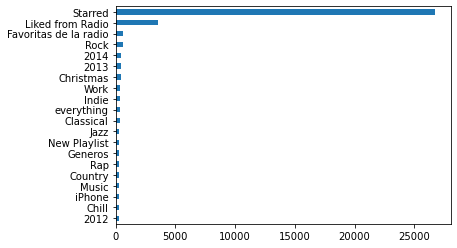

In [26]:
# Top 20 playlists:

df['playlist'].value_counts()[:20].sort_values().plot(kind = 'barh')

memory based or model based --- memory based, user-item
use lightfm (python implementation)